<a href="https://colab.research.google.com/github/IonaSantana/Artificial-Intelligence/blob/main/Projects/Classicos/Flight%20Delays%20and%20Cancellations/Flight_delay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fligh-Delay, qual compania eu devo ir?
O que é um atraso?
E quanto um atraso pode ser tolerado?

Quais voos atrasam mais?

### Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn #correlacionar


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
airline = pd.read_csv("/content/drive/MyDrive/Flight Delays and Cancellations/airlines.csv")
airports = pd.read_csv("/content/drive/MyDrive/Flight Delays and Cancellations/airports.csv")
flights = pd.read_csv("/content/drive/MyDrive/Flight Delays and Cancellations/flights.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Funções

Coeficiente de Pearson -1 a 1, quanto mais próximo de um desse valores, maior a correlação 

Links: 

https://medium.com/omixdata/estat%C3%ADstica-an%C3%A1lise-de-correla%C3%A7%C3%A3o-usando-python-e-r-d68611511b5a

https://seaborn.pydata.org/generated/seaborn.heatmap.html

In [5]:
def pearson(data):
  correlacao = data.corr()
  mask = np.zeros_like(correlacao)
  mask[np.triu_indices_from(mask)] = True
  with sn.axes_style("white"):
      f, ax = plt.subplots(figsize=(10, 7))
  plot = sn.heatmap(correlacao, mask = mask,annot = True, fmt = ".1f", linewidths = .6)

Correlação entre duas variáveis

In [6]:
def plot_correlacao(x, y, text_x, text_y):
  plt.scatter(x, y,  color='blue')
  plt.xlabel(text_x) 
  plt.ylabel(text_y)
  plt.show()

### EDA

In [7]:
dic_air = airline.set_index('IATA_CODE', drop = True).to_dict('dict')
airline.head()

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways


In [8]:
airports.head()

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


In [9]:
flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
flights.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')

In [11]:
flights.shape #5819079 de informações em 31 colunas

(5819079, 31)

### PEARSON

Antes de retirar os valores nulos

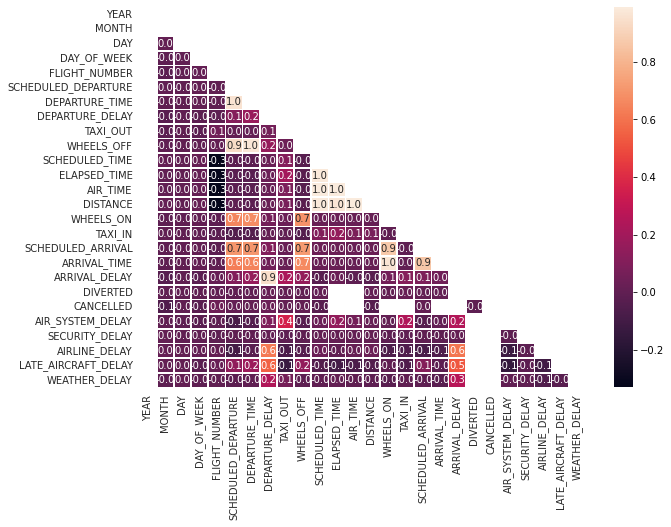

In [12]:
pearson(flights)

In [13]:
flights.isna().sum()

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER              14721
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           86153
DEPARTURE_DELAY          86153
TAXI_OUT                 89047
WHEELS_OFF               89047
SCHEDULED_TIME               6
ELAPSED_TIME            105071
AIR_TIME                105071
DISTANCE                     0
WHEELS_ON                92513
TAXI_IN                  92513
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             92513
ARRIVAL_DELAY           105071
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    5729195
AIR_SYSTEM_DELAY       4755640
SECURITY_DELAY         4755640
AIRLINE_DELAY          4755640
LATE_AIRCRAFT_DELAY    4755640
WEATHER_DELAY          4755640
dtype: int64

In [14]:
flights = flights.drop(['CANCELLATION_REASON'], axis=1)

In [15]:
teste_flights = flights
flights = flights.dropna()

Após retirar os valores nulos

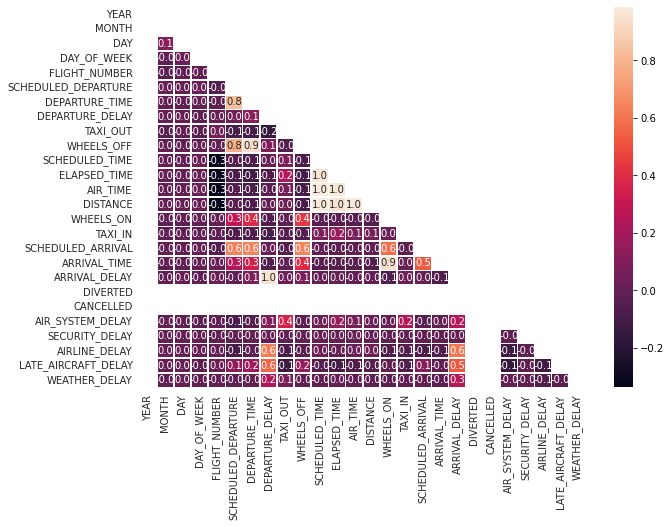

In [16]:
pearson(flights)

Retirar as colunas com menos de +-0.6 de correlação

In [17]:
teste_flights1 = teste_flights

In [18]:
#'DAY_OF_WEEK', 'TAXI_OUT', 'TAXI_IN',
teste_flights = teste_flights1.drop(['YEAR','MONTH', 'DAY', 'FLIGHT_NUMBER','TAIL_NUMBER','DIVERTED','CANCELLED','SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'AIR_SYSTEM_DELAY'], axis=1)

In [19]:
teste_flights.columns

Index(['DAY_OF_WEEK', 'AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY'],
      dtype='object')

In [20]:
teste_flights.isna().sum()

DAY_OF_WEEK                 0
AIRLINE                     0
ORIGIN_AIRPORT              0
DESTINATION_AIRPORT         0
SCHEDULED_DEPARTURE         0
DEPARTURE_TIME          86153
DEPARTURE_DELAY         86153
TAXI_OUT                89047
WHEELS_OFF              89047
SCHEDULED_TIME              6
ELAPSED_TIME           105071
AIR_TIME               105071
DISTANCE                    0
WHEELS_ON               92513
TAXI_IN                 92513
SCHEDULED_ARRIVAL           0
ARRIVAL_TIME            92513
ARRIVAL_DELAY          105071
dtype: int64

In [21]:
teste_flights = teste_flights.dropna()

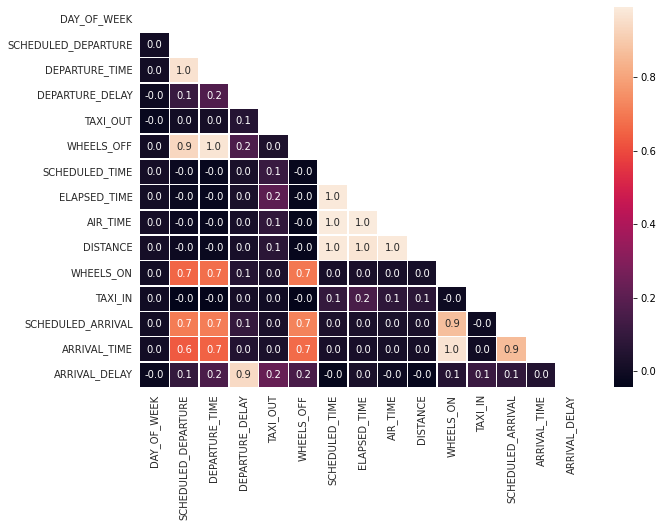

In [22]:
pearson(teste_flights)

### Quantidade de atraso por dia da semana

In [23]:
#quantidade de atraso por dia da semana
atrasado = []
adiantada = []
atrasado = teste_flights[teste_flights['ARRIVAL_DELAY'] > 0]
adiantado = teste_flights[teste_flights['ARRIVAL_DELAY'] <= 0]

In [24]:
atrasado['DAY_OF_WEEK'].dtype

dtype('int64')

In [25]:
for i in atrasado['DAY_OF_WEEK'].unique():
  print(round((len(atrasado[atrasado['DAY_OF_WEEK'] == i]) / len(atrasado)) * 100, 2))

16.08
15.64
10.77
13.7
15.09
14.14
14.58


In [26]:
for i in adiantado['DAY_OF_WEEK'].unique():
  print(round((len(adiantado[adiantado['DAY_OF_WEEK'] == i]) / len(adiantado)) * 100, 2))

14.4
14.47
12.82
14.25
14.52
14.67
14.86


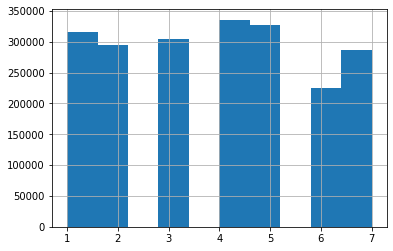

In [27]:
atrasado['DAY_OF_WEEK'].hist()

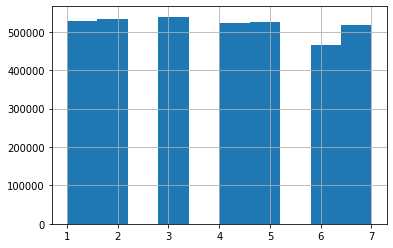

In [28]:
adiantado['DAY_OF_WEEK'].hist()

retirada dos dias da semana, pois não foi encontrada grande diferença entre eles

In [29]:
teste_flights = teste_flights.drop(['DAY_OF_WEEK'], axis = 1)

### **Porcentagem de atraso por companhia área**

In [30]:
array = []
for i in atrasado['AIRLINE'].unique(): 
  aux_atra = atrasado[atrasado['AIRLINE'] == i]
  aux_adia = adiantado[adiantado['AIRLINE'] == i]
  resp = str(i) + ' - ' + str(round (aux_atra['AIRLINE'].count() / (len(aux_atra) + len(aux_adia)) * 100 , 2));
  array.append(resp)
print(array)


['US - 39.28', 'DL - 28.82', 'NK - 49.38', 'AA - 35.37', 'HA - 39.69', 'B6 - 38.92', 'UA - 36.68', 'OO - 38.56', 'EV - 38.43', 'F9 - 45.77', 'WN - 37.89', 'AS - 33.22', 'MQ - 37.13', 'VX - 39.48']


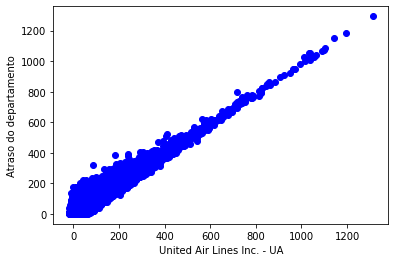

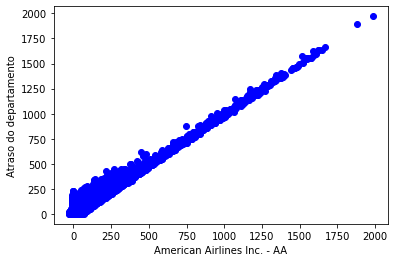

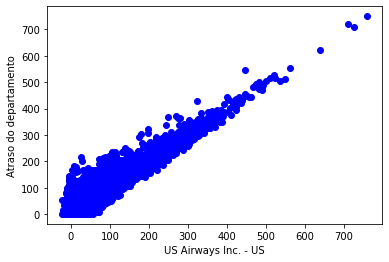

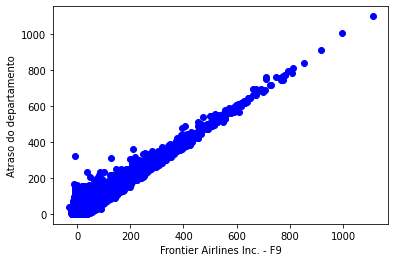

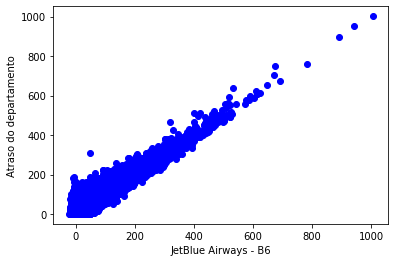

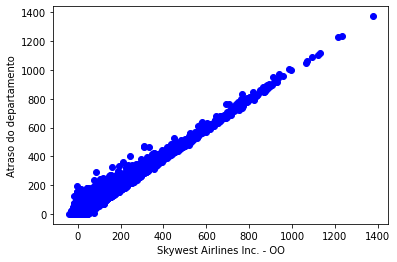

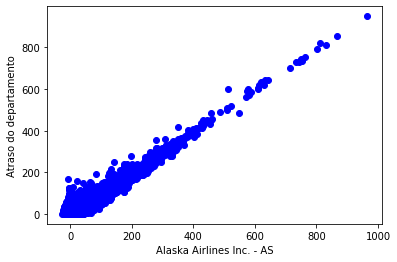

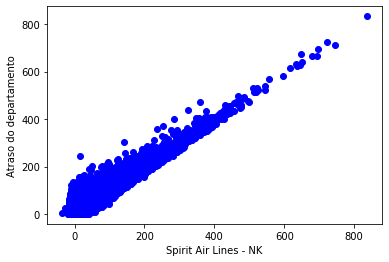

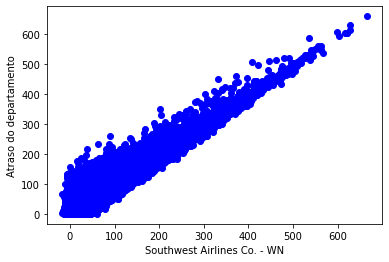

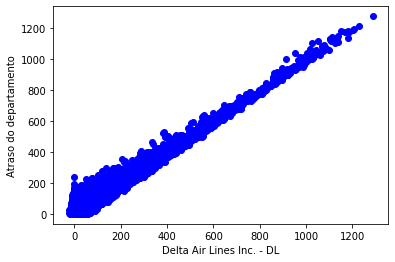

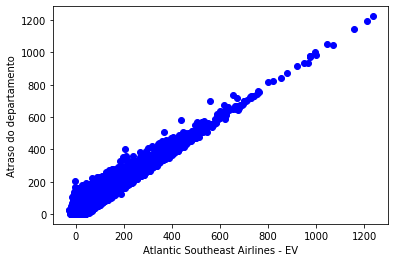

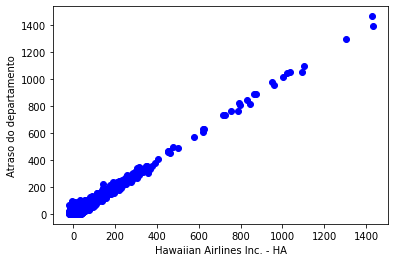

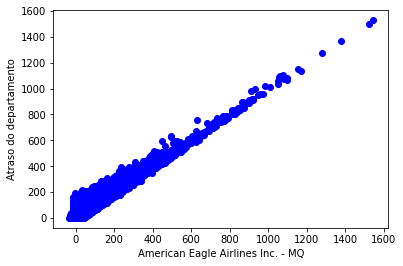

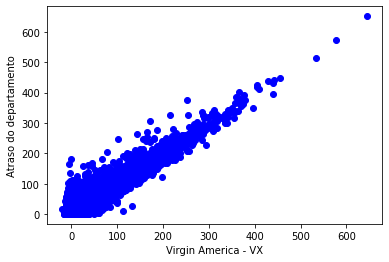

In [31]:
for companhia in airline['IATA_CODE']:
  companhia_plot = atrasado[atrasado['AIRLINE'] == companhia]
  plt.subplot()
  plot_correlacao(companhia_plot.DEPARTURE_DELAY, companhia_plot.ARRIVAL_DELAY, dic_air['AIRLINE'][companhia] + ' - ' + companhia, 'Atraso do departamento')
plt.show()

Média dos atrasos

Considerando só os atrasados

In [75]:
media_atrasos = []
for companhia in airline['IATA_CODE']:
  companhia_plot = atrasado[atrasado['AIRLINE'] == companhia]
  media_atrasos.append([dic_air['AIRLINE'][companhia], companhia, round(companhia_plot['ARRIVAL_DELAY'].mean(),2)])
  print(companhia, '         ', round(companhia_plot['ARRIVAL_DELAY'].mean(),2))

UA           39.21
AA           34.15
US           27.42
F9           41.19
B6           38.13
OO           32.44
AS           22.56
NK           40.66
WN           29.42
DL           32.08
EV           35.2
HA           15.38
MQ           39.51
VX           30.73


### Dataframe que será considerado

In [33]:
teste_flights = teste_flights.drop(['ORIGIN_AIRPORT', 'DESTINATION_AIRPORT'], axis = 1)
columns_corr = teste_flights.columns

In [34]:
flights_time = flights[columns_corr]
flights_time.columns

Index(['AIRLINE', 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY',
       'TAXI_OUT', 'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME',
       'DISTANCE', 'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY'],
      dtype='object')

In [35]:
flights_time.shape

(1063439, 15)

In [36]:
flights_time.head()

,AIRLINE,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY
27,NK,115,127.0,12.0,14.0,141.0,207.0,220.0,166.0,1487,527.0,40.0,542,607.0,25.0
30,NK,125,237.0,72.0,9.0,246.0,204.0,175.0,156.0,1440,622.0,10.0,549,632.0,43.0
35,HA,145,145.0,0.0,16.0,201.0,370.0,385.0,361.0,2762,602.0,8.0,555,610.0,15.0
50,B6,307,304.0,-3.0,25.0,329.0,173.0,196.0,160.0,1129,509.0,11.0,500,520.0,20.0
52,B6,400,535.0,95.0,9.0,544.0,185.0,175.0,163.0,1189,727.0,3.0,605,730.0,85.0


In [37]:
flights_time.shape

(1063439, 15)

In [38]:
flights_time.sort_values(['DEPARTURE_DELAY'], ascending=False).head()

,AIRLINE,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY
337720,AA,700,1608.0,1988.0,13.0,1621.0,134.0,117.0,99.0,597,1800.0,5.0,914,1805.0,1971.0
3412085,AA,709,1427.0,1878.0,28.0,1455.0,185.0,205.0,156.0,1158,1631.0,21.0,914,1652.0,1898.0
4103531,AA,700,1050.0,1670.0,26.0,1116.0,179.0,174.0,142.0,1171,1538.0,6.0,1159,1544.0,1665.0
5810811,AA,1041,1410.0,1649.0,12.0,1422.0,104.0,91.0,69.0,569,1631.0,10.0,1325,1641.0,1636.0
5279939,AA,1027,1338.0,1631.0,14.0,1352.0,82.0,89.0,56.0,235,1348.0,19.0,1049,1407.0,1638.0


In [39]:
flights_time = flights_time.sort_values(['DEPARTURE_DELAY'], ascending=True)


In [40]:
flights_time.head()

,AIRLINE,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY
3035017,F9,1945,1913.0,-32.0,42.0,1955.0,150.0,220.0,132.0,1024,2307.0,46.0,2315,2353.0,38.0
5663231,AA,1815,1744.0,-31.0,17.0,1801.0,183.0,230.0,160.0,1139,1941.0,53.0,2018,2034.0,16.0
3858620,EV,600,530.0,-30.0,28.0,558.0,86.0,140.0,106.0,433,744.0,6.0,726,750.0,24.0
3645296,EV,2046,2016.0,-30.0,6.0,2022.0,30.0,85.0,75.0,69,2137.0,4.0,2116,2141.0,25.0
5357535,OO,710,640.0,-30.0,69.0,749.0,185.0,234.0,161.0,1254,1230.0,4.0,1215,1234.0,19.0


## **Gráficos**

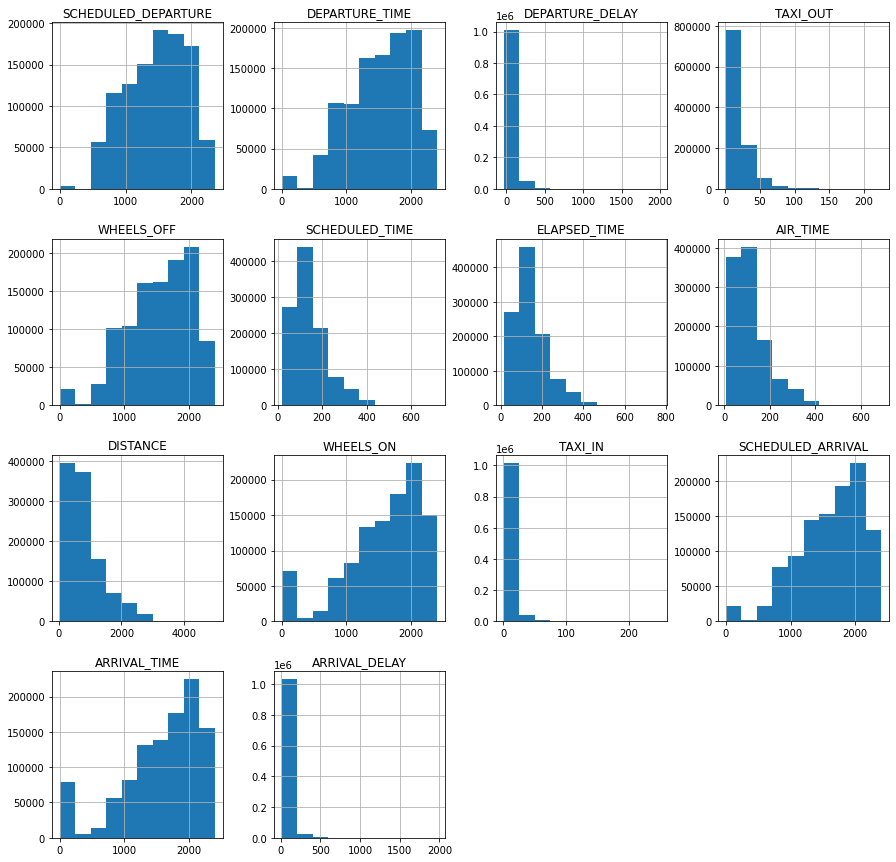

In [41]:
flights_time.hist(figsize=[15,15])
plt.show()

In [42]:
flights_time.columns

Index(['AIRLINE', 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY',
       'TAXI_OUT', 'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME',
       'DISTANCE', 'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY'],
      dtype='object')

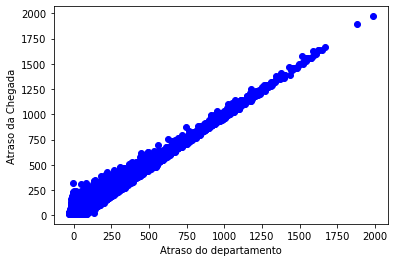

In [43]:
plot_correlacao(flights_time.DEPARTURE_DELAY, flights_time.ARRIVAL_DELAY, 'Atraso do departamento', 'Atraso da Chegada')

Sei que o atraso do departamento atrasa a chegada, mas o que causa o atraso do departamento?

### Regressão Linear Simples

In [51]:
from sklearn import  linear_model
from sklearn.metrics import r2_score

In [64]:
def train_regr(train):
  regr = linear_model.LinearRegression()
  train_x = np.asanyarray(train[['DEPARTURE_DELAY']])
  train_y = np.asanyarray(train[['ARRIVAL_DELAY']])
  regr.fit (train_x, train_y)
  # The coefficients
  print ('Coefficients: ', regr.coef_)
  print ('Intercept: ',regr.intercept_)
  plt.scatter(train.DEPARTURE_DELAY, train.ARRIVAL_DELAY,  color='blue')
  plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
  plt.xlabel('Atraso do departamento')
  plt.ylabel('Atraso do chegada')
  plt.show()

In [65]:
def test_regr(test):
  test_x = np.asanyarray(test[['DEPARTURE_DELAY']])
  test_y = np.asanyarray(test[['ARRIVAL_DELAY']])
  test_y_ = regr.predict(test_x)

  print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
  print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
  print("R2-score: %.2f" % r2_score(test_y , test_y_) )

In [66]:
def regressao_linear_simples(flights_time):
  msk = np.random.rand(len(flights_time)) < 0.8
  train = flights_time[msk]
  test = flights_time[~msk]
  train_regr(train)
  test_regr(test)



 United Air Lines Inc. 

Coefficients:  [[0.92055753]]
Intercept:  [1.95994587]


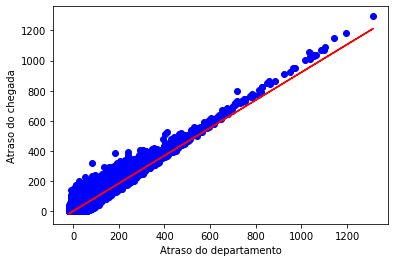

Mean absolute error: 13.63
Residual sum of squares (MSE): 318.85
R2-score: 0.90


 American Airlines Inc. 

Coefficients:  [[0.93773552]]
Intercept:  [5.72396175]


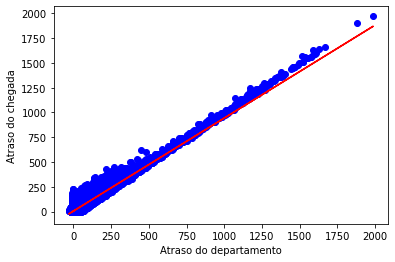

Mean absolute error: 11.85
Residual sum of squares (MSE): 291.64
R2-score: 0.93


 US Airways Inc. 

Coefficients:  [[0.89293599]]
Intercept:  [9.02309063]


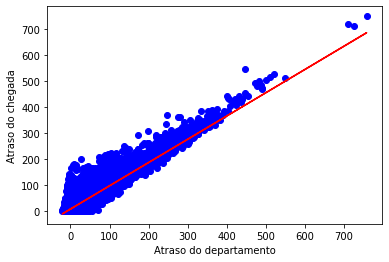

Mean absolute error: 10.58
Residual sum of squares (MSE): 241.18
R2-score: 0.86


 Frontier Airlines Inc. 

Coefficients:  [[0.94686103]]
Intercept:  [7.82417797]


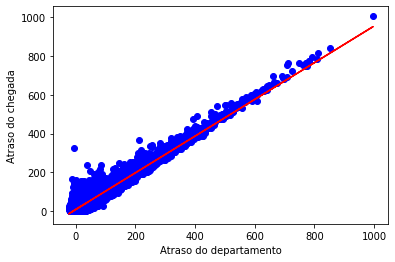

Mean absolute error: 11.10
Residual sum of squares (MSE): 252.63
R2-score: 0.94


 JetBlue Airways 

Coefficients:  [[0.9189016]]
Intercept:  [6.26451172]


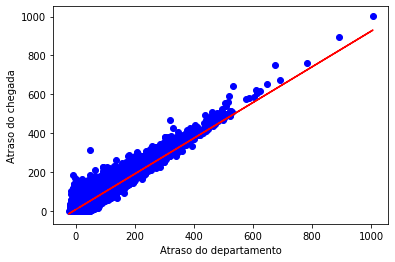

Mean absolute error: 11.75
Residual sum of squares (MSE): 262.71
R2-score: 0.90


 Skywest Airlines Inc. 

Coefficients:  [[0.92916135]]
Intercept:  [6.67974276]


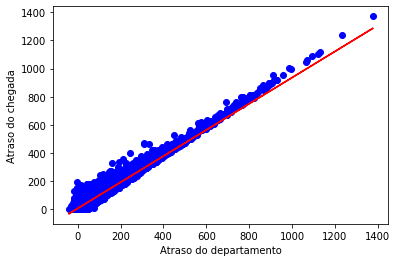

Mean absolute error: 9.43
Residual sum of squares (MSE): 176.26
R2-score: 0.94


 Alaska Airlines Inc. 

Coefficients:  [[0.89539802]]
Intercept:  [7.93140089]


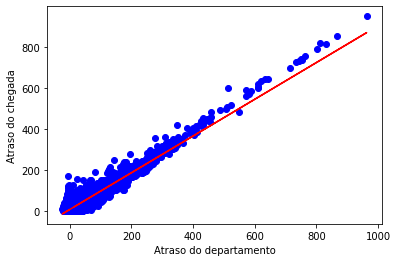

Mean absolute error: 8.11
Residual sum of squares (MSE): 125.87
R2-score: 0.91


 Spirit Air Lines 

Coefficients:  [[0.93250984]]
Intercept:  [6.85296309]


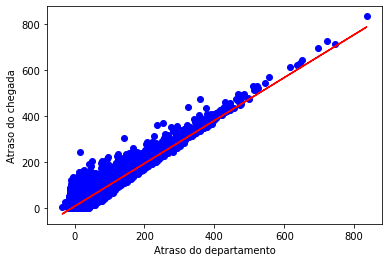

Mean absolute error: 10.91
Residual sum of squares (MSE): 237.46
R2-score: 0.92


 Southwest Airlines Co. 

Coefficients:  [[0.93241844]]
Intercept:  [1.60091343]


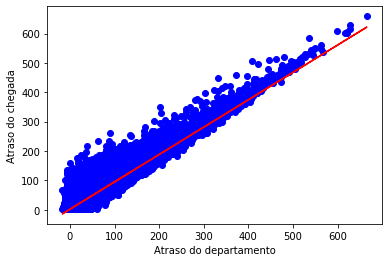

Mean absolute error: 10.41
Residual sum of squares (MSE): 173.82
R2-score: 0.90


 Delta Air Lines Inc. 

Coefficients:  [[0.93770356]]
Intercept:  [4.15522627]


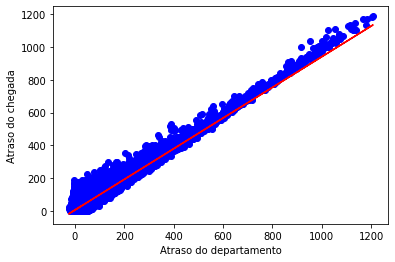

Mean absolute error: 11.49
Residual sum of squares (MSE): 248.55
R2-score: 0.93


 Atlantic Southeast Airlines 

Coefficients:  [[0.93304931]]
Intercept:  [7.26177748]


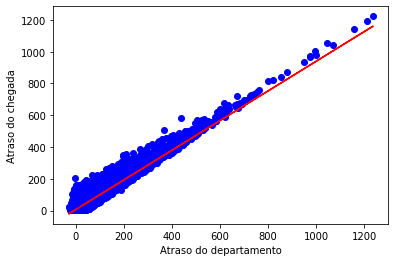

Mean absolute error: 10.11
Residual sum of squares (MSE): 209.37
R2-score: 0.93


 Hawaiian Airlines Inc. 

Coefficients:  [[0.9623649]]
Intercept:  [6.34887938]


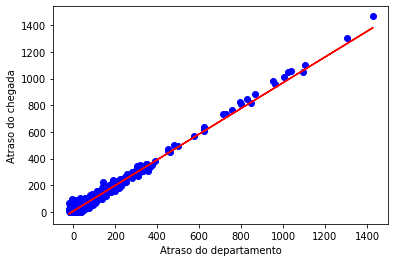

Mean absolute error: 6.14
Residual sum of squares (MSE): 70.78
R2-score: 0.94


 American Eagle Airlines Inc. 

Coefficients:  [[0.95560317]]
Intercept:  [7.38389658]


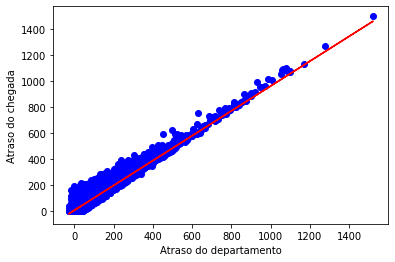

Mean absolute error: 12.25
Residual sum of squares (MSE): 326.54
R2-score: 0.91


 Virgin America 

Coefficients:  [[0.91482683]]
Intercept:  [6.45571988]


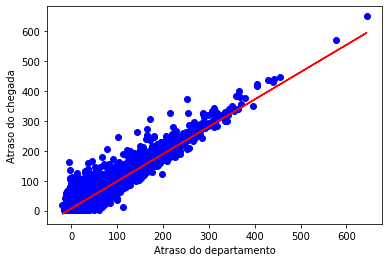

Mean absolute error: 10.16
Residual sum of squares (MSE): 212.87
R2-score: 0.89


In [69]:
for companhia in airline['IATA_CODE']:
  companhia_plot = atrasado[atrasado['AIRLINE'] == companhia]
  print('\n\n', dic_air['AIRLINE'][companhia], '\n')
  regressao_linear_simples(companhia_plot)
  

### Gráficos em relação ao atraso do departamento

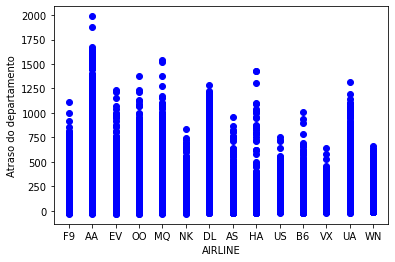

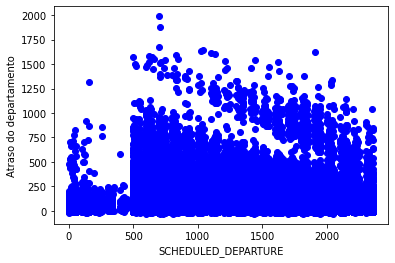

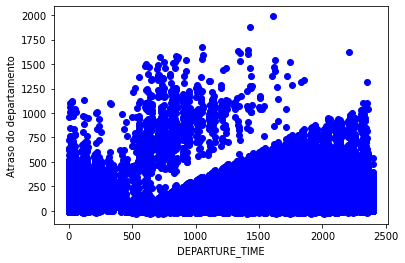

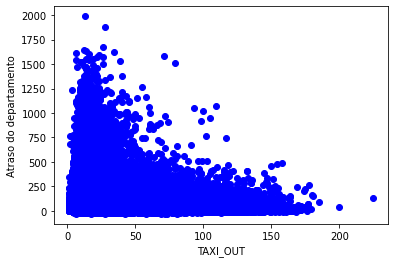

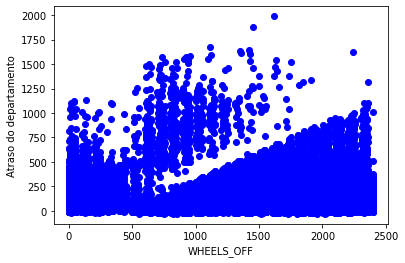

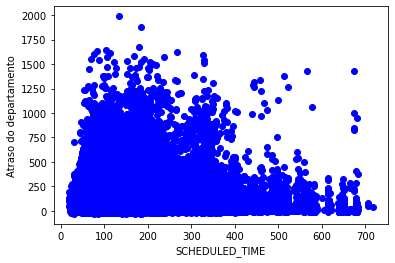

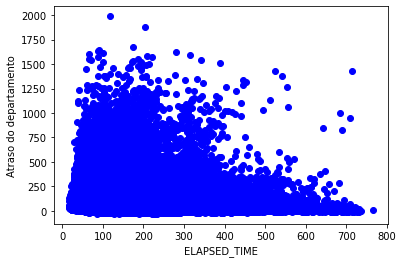

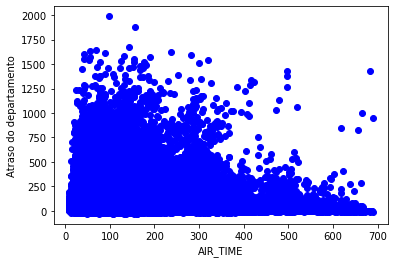

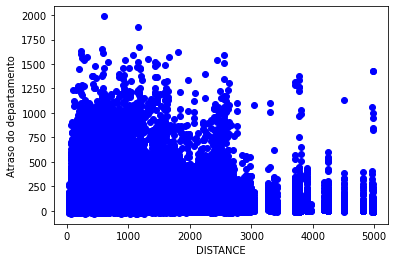

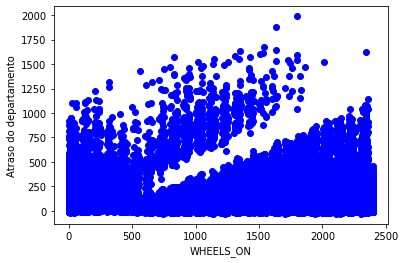

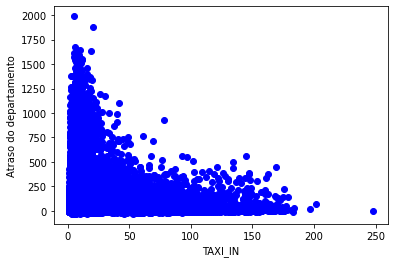

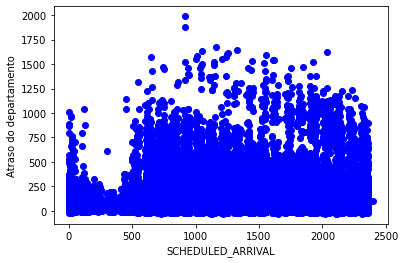

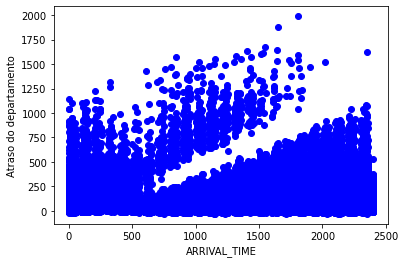

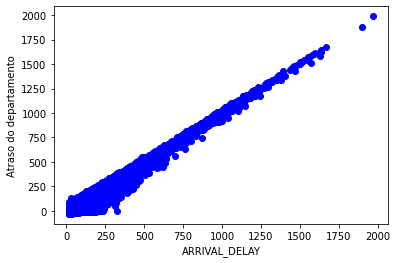

In [70]:
flights_time_aux = flights_time.astype('category')
for col in flights_time.columns:
  if col != 'DEPARTURE_DELAY':
    plt.subplot()
    plot_correlacao(flights_time_aux[col], flights_time_aux['DEPARTURE_DELAY'], col, 'Atraso do departamento')
plt.show()

### Conclusão:

Como visto pelo **Coeficiente de Pearson**, sendo o coeficiente DEPARTURE_DELAY x ARRIVAL_DELAY de 0.9.

O atraso do departamento está altamente correlacionado positivamente com o atraso da chegada.

Através da regressão linear simples, o menor R2-score encontrado foi 0.86.

Tendo que mais perto de 1 melhor.

Para mais informações: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html


Sendo a média de atraso em minutos das empresas (em ordem crescente):

In [88]:
media_atrasos = sorted(media_atrasos, key = lambda media_atrasos_entry: media_atrasos_entry[2])
for i in media_atrasos:
  print(i[1], ' ', i[2], ' ', i[0])

HA   15.38   Hawaiian Airlines Inc.
AS   22.56   Alaska Airlines Inc.
US   27.42   US Airways Inc.
WN   29.42   Southwest Airlines Co.
VX   30.73   Virgin America
DL   32.08   Delta Air Lines Inc.
OO   32.44   Skywest Airlines Inc.
AA   34.15   American Airlines Inc.
EV   35.2   Atlantic Southeast Airlines
B6   38.13   JetBlue Airways
UA   39.21   United Air Lines Inc.
MQ   39.51   American Eagle Airlines Inc.
NK   40.66   Spirit Air Lines
F9   41.19   Frontier Airlines Inc.



# O que levaria a escolher a **HA - Hawaiian Airlines Inc.** com 15.38 de atraso.